In [7]:
import json
import matplotlib.pyplot as plt
import numpy as np

In [8]:
json_data = {}

def read_log_data(log_file, executable, p, t):
	print(f"[INFO] [EXE]: {executable} |  Reading log file: {log_file}")

	data = {
		"contributionNodes": 0,
		"particleDensity": 0,
		"particleStress": 0,
		"nodalMass": 0,
		"nodalMomentum": 0,
		"nodalInternalForce": 0,
		"nodalExternalForce": 0,
		"particleStrainIncrement": 0,
		"particleVorticityIncrement": 0
	}

	log_data = ""

	# Read log files
	with open(f"logs/{log_file}.log", "r") as f:
			log_data = f.read()

	lines = log_data.split("\n")

	for line in lines:
			for key in data.keys():
					if f"{key} took" in line:
							data[key] = float(line.split(" ")[-2])
							print(f"[INFO] Processing line: {line}")

	for key in data.keys():
			print(f"[INFO] {key}: {data[key]}")

	print(f"[INFO] [EXE]: {executable} | Saving data to: {log_file}-data.json")
	with open(f"temp/{log_file}-data.json", "w") as f:
			json.dump(data, f, indent=4)

	print(f"[INFO] [EXE]: {executable}-{p}-{t}|  Data saved successfully.")

def load_json(log_file, executable, p, t):
	data = {
		"contributionNodes": 0,
		"particleDensity": 0,
		"particleStress": 0,
		"nodalMass": 0,
		"nodalMomentum": 0,
		"nodalInternalForce": 0,
		"nodalExternalForce": 0,
		"particleStrainIncrement": 0,
		"particleVorticityIncrement": 0
	}
		
	with open(f"temp/{log_file}-data.json", "r") as f:
		data = json.load(f)
	json_data[executable][p][t] = data

In [9]:
executables = ["atomic", "main", "local"]
material_points = ["p150k", "p250k", "p500k"]
threads = ["t1", "t5", "t10"]

for exe in executables:
	json_data[exe] = {}
	for p in material_points:
		json_data[exe][p] = {}
		for t in threads:
				json_data[exe][p][t] = {}
				# read_log_data(f"config-{p}-{t}-{exe}", exe, p, t)
				load_json(f"config-{p}-{t}-{exe}", exe, p, t)

In [10]:
#read json

average = 0
sum = 0

for exe in json_data.keys():
		print(f"[INFO] Processing averages for executable: {exe}")
		for p in json_data[exe].keys():
			if isinstance(json_data[exe][p], dict):
				for t in json_data[exe][p].keys():
					json_data[exe][p][t]["average"] = 0
					for f in json_data[exe][p][t].keys():
						sum += json_data[exe][p][t][f]
					average = sum / len(json_data[exe][p][t].keys())
					json_data[exe][p][t]["average"] = average
					sum = 0
					print(f"[INFO] {exe} - {p} - {t}: {json_data[exe][p][t]['average']}")


[INFO] Processing averages for executable: atomic
[INFO] atomic - p150k - t1: 3434.9610000000002
[INFO] atomic - p150k - t5: 1280.3780000000002
[INFO] atomic - p150k - t10: 1049.9445
[INFO] atomic - p250k - t1: 5589.475
[INFO] atomic - p250k - t5: 2027.045
[INFO] atomic - p250k - t10: 1658.529
[INFO] atomic - p500k - t1: 15019.459999999997
[INFO] atomic - p500k - t5: 6222.169
[INFO] atomic - p500k - t10: 4501.728
[INFO] Processing averages for executable: main
[INFO] main - p150k - t1: 3796.7350000000006
[INFO] main - p150k - t5: 3030.0260000000003
[INFO] main - p150k - t10: 2899.686
[INFO] main - p250k - t1: 6461.851000000001
[INFO] main - p250k - t5: 6255.192
[INFO] main - p250k - t10: 6135.179
[INFO] main - p500k - t1: 16733.52
[INFO] main - p500k - t5: 11816.373000000001
[INFO] main - p500k - t10: 9977.127
[INFO] Processing averages for executable: local
[INFO] local - p150k - t1: 3318.079
[INFO] local - p150k - t5: 1532.1039999999998
[INFO] local - p150k - t10: 1503.277
[INFO] loc

In [14]:
main_150_01_relative_value = json_data["main"][material_points[0]][threads[0]]["average"]
main_250_01_relative_value = json_data["main"][material_points[1]][threads[0]]["average"]
main_500_01_relative_value = json_data["main"][material_points[2]][threads[0]]["average"]
print(f"[INFO] main_150_01_relative_value: {main_150_01_relative_value}")
print(f"[INFO] main_250_01_relative_value: {main_250_01_relative_value}")
print(f"[INFO] main_500_01_relative_value: {main_500_01_relative_value}")


[INFO] main_150_01_relative_value: 3796.7350000000006
[INFO] main_250_01_relative_value: 6461.851000000001
[INFO] main_500_01_relative_value: 16733.52


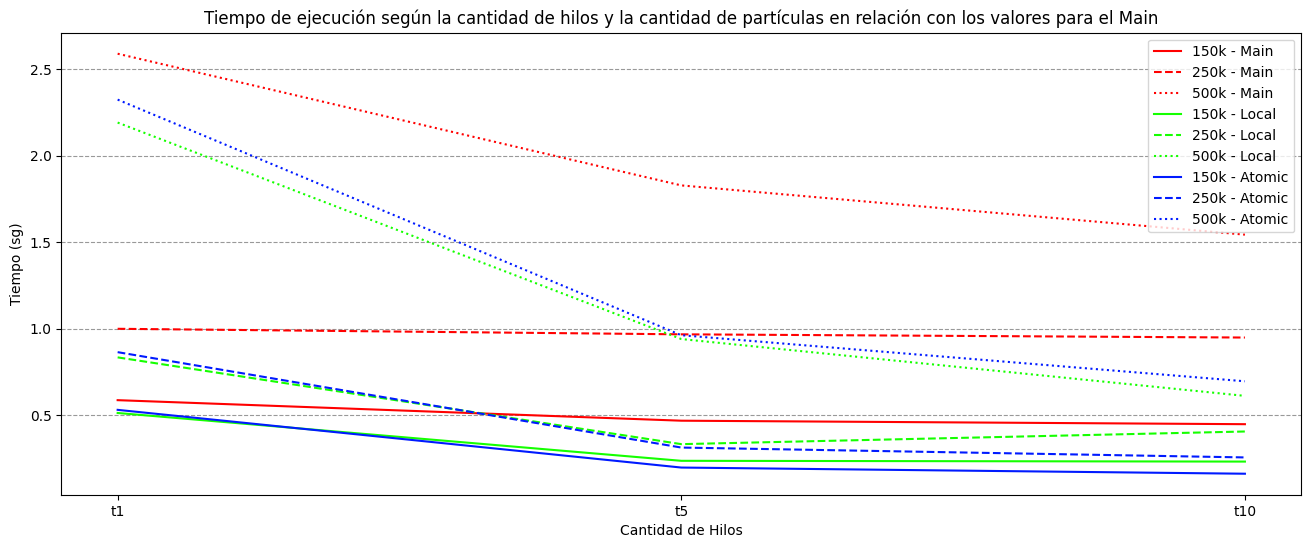

In [ ]:
branches = {
	"main": [],
	"atomic": [],
	"local": []
}

for branch in branches:
		for t in json_data[branch][material_points[0]].keys():
				branches[branch].append(json_data[branch][material_points[0]][t]["average"]/1000)

main_relative_p150 = [thread["average"]/main_250_01_relative_value for thread in json_data["main"][material_points[0]].values()]
main_relative_p250 = [thread["average"]/main_250_01_relative_value for thread in json_data["main"][material_points[1]].values()]
main_relative_p500 = [thread["average"]/main_250_01_relative_value for thread in json_data["main"][material_points[2]].values()]

atomic_relative_p150 = [thread["average"]/main_250_01_relative_value for thread in json_data["atomic"][material_points[0]].values()]
atomic_relative_p250 = [thread["average"]/main_250_01_relative_value for thread in json_data["atomic"][material_points[1]].values()]
atomic_relative_p500 = [thread["average"]/main_250_01_relative_value for thread in json_data["atomic"][material_points[2]].values()]

local_relative_p150 = [thread["average"]/main_250_01_relative_value for thread in json_data["local"][material_points[0]].values()]
local_relative_p250 = [thread["average"]/main_250_01_relative_value for thread in json_data["local"][material_points[1]].values()]
local_relative_p500 = [thread["average"]/main_250_01_relative_value for thread in json_data["local"][material_points[2]].values()]

n = len(threads)
x = np.arange(n) + 1  # posiciones en el eje X

ancho = 0.1

plt.figure(figsize=(16, 6))
# plt.bar(x - ancho, branches["main"], width=ancho, label="Main", color="#F17474")
# plt.bar(x, branches["atomic"], width=ancho, label="Atomic", color="#CE74F1")
# plt.bar(x + ancho, branches["local"], width=ancho, label="Local", color="#74F1E0")

plt.plot(x, main_relative_p150, color="#FF0000")
plt.plot(x, main_relative_p250, color="#FF0000", linestyle='dashed')
plt.plot(x, main_relative_p500, color="#FF0000", linestyle='dotted')

plt.plot(x, local_relative_p150, color="#15FF00")
plt.plot(x, local_relative_p250, color="#15FF00", linestyle='dashed')
plt.plot(x, local_relative_p500, color="#15FF00", linestyle='dotted')

plt.plot(x, atomic_relative_p150, color="#001AFF")
plt.plot(x, atomic_relative_p250, color="#001AFF", linestyle='dashed')
plt.plot(x, atomic_relative_p500, color="#001AFF", linestyle='dotted')


# Labels 
plt.legend(["150k - Main", "250k - Main", "500k - Main", "150k - Local", "250k - Local",
							"500k - Local", "150k - Atomic",
							"250k - Atomic", "500k - Atomic"], loc="upper right")

plt.grid(axis='y', linestyle='--', color="#000000", alpha=0.4)

# Personalizar
plt.xticks(x, threads)
plt.xlabel("Cantidad de Hilos")
plt.ylabel("Tiempo (s)")
# plt.xlim(0., 3.1)   # límite eje X
# plt.ylim(0, 1.25)  # límite eje Y
plt.title("Tiempo de ejecución según la cantidad de hilos y la cantidad de partículas en relación con los valores para el Main")
plt.show()

